In [31]:
from sklearn.datasets import load_digits, make_s_curve
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import numpy as np

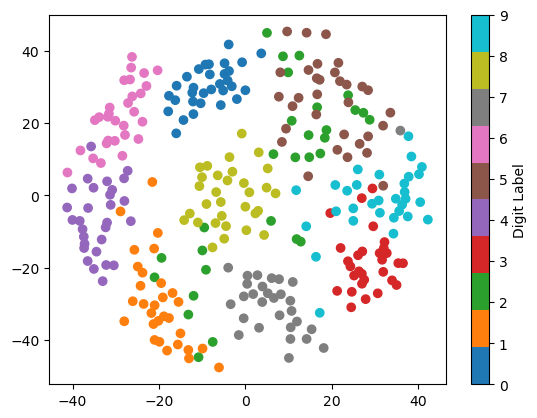

In [32]:
x, y = load_digits(return_X_y=True)
samples = 300
embedding = MDS(n_components=2, random_state=0)
x_transformed = embedding.fit_transform(x[:samples])
plt.scatter(x_transformed[:, 0], x_transformed[:, 1], c=y[:samples], cmap='tab10')
plt.colorbar(label='Digit Label')
plt.show()

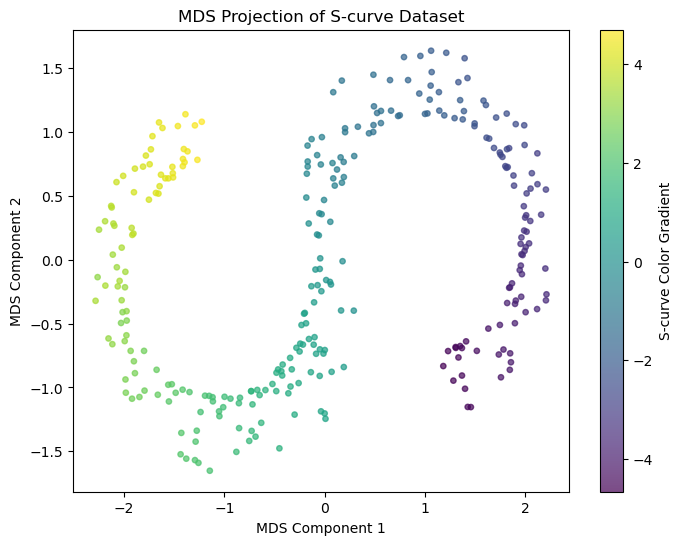

In [33]:
n_samples = 300
S_points, S_color = make_s_curve(n_samples, random_state=0)
embedding = MDS(n_components=2, random_state=42)
S_transformed = embedding.fit_transform(S_points)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(S_transformed[:, 0], S_transformed[:, 1], c=S_color, cmap='viridis', s=15, alpha=0.7)
plt.colorbar(scatter, label="S-curve Color Gradient")
plt.xlabel("MDS Component 1")
plt.ylabel("MDS Component 2")
plt.title("MDS Projection of S-curve Dataset")
plt.show()

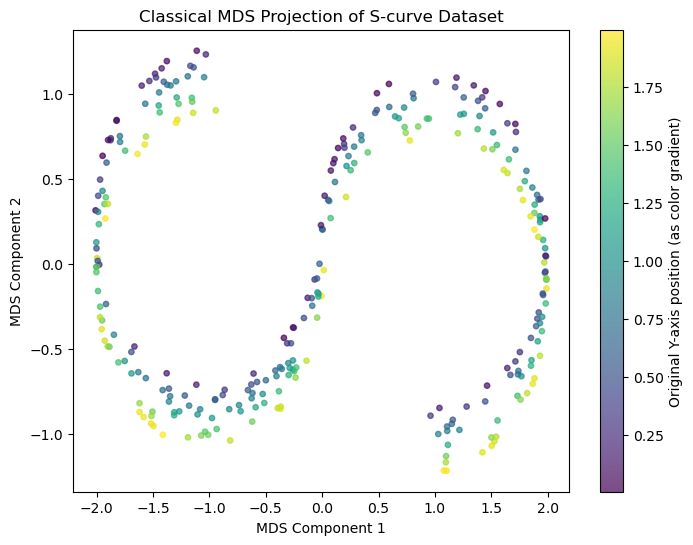

In [34]:
n_samples = 300
S_points, _ = make_s_curve(n_samples, random_state=0)
D = squareform(pdist(S_points, metric='euclidean'))
n = D.shape[0]
H = np.eye(n) - np.ones((n, n)) / n
D_squared = D ** 2
B = -0.5 * H @ D_squared @ H
eigenvalues, eigenvectors = np.linalg.eigh(B)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
m = 2
Lambda_m = np.diag(np.sqrt(eigenvalues[:m]))
Q_m = eigenvectors[:, :m]
X_transformed = Q_m @ Lambda_m
plt.figure(figsize=(8, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=S_points[:, 1], cmap='viridis', s=15, alpha=0.7)
plt.colorbar(label="Original Y-axis position (as color gradient)")
plt.xlabel("MDS Component 1")
plt.ylabel("MDS Component 2")
plt.title("Classical MDS Projection of S-curve Dataset")
plt.show()

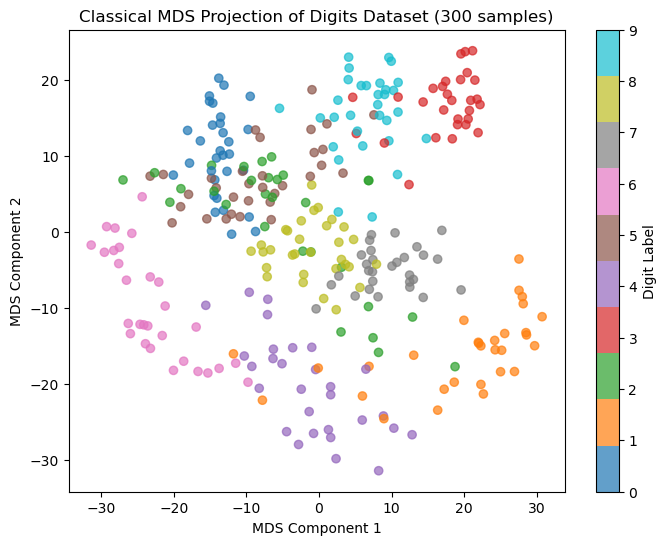

In [36]:
x, y = load_digits(return_X_y=True)

samples = 300
x_subset = x[:samples]
y_subset = y[:samples]

D = squareform(pdist(x_subset, metric='euclidean'))

n = D.shape[0]
H = np.eye(n) - np.ones((n, n)) / n

D_squared = D ** 2
B = -0.5 * H @ D_squared @ H

eigenvalues, eigenvectors = np.linalg.eigh(B)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

m = 2 
Lambda_m = np.diag(np.sqrt(eigenvalues[:m]))  
Q_m = eigenvectors[:, :m]

X_transformed = Q_m @ Lambda_m

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_subset, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label="Digit Label")
plt.xlabel("MDS Component 1")
plt.ylabel("MDS Component 2")
plt.title("Classical MDS Projection of Digits Dataset (300 samples)")
plt.show()